<pre>

1.Implementing Classification Algorithms:
Design and implement decision tree, SVM, and k-NN classifiers. 
Evaluate their performance using confusion matrices, ROC curves, and other metrics on a dataset of your choice.

</pre>

### KNN (K - nearest neighbour algorithm )

In [23]:
# installation of required libraries
!pip install seaborn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [18]:
#**Load Breast Cancer Dataset from Sklearn**
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data  # Features
y = breast_cancer.target  # Target (0: Malignant, 1: Benign)

In [20]:
#**Split Dataset**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
#**Feature Scaling**
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# **Train KNN Model**
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)



# knn1 = KNeighborsClassifier(n_neighbors=1)
# knn1.fit(X_train, y_train)


# knn3 = KNeighborsClassifier(n_neighbors=1)
# knn3.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
# **Make Predictions**
y_pred = knn.predict(X_test)

In [24]:
# **Evaluate Model**
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Confusion Matrix:
 [[39  3]
 [ 2 70]]


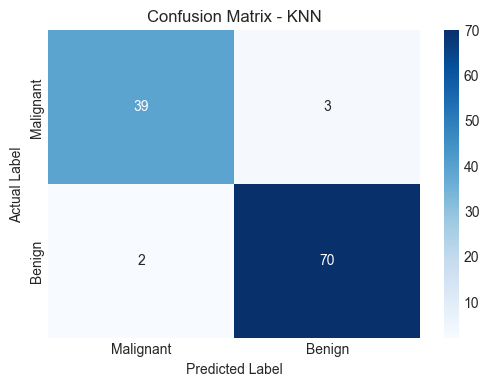

In [29]:
#**Confusion Matrix**
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import pandas as pd

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


plt.figure(figsize=(6,4))
sns.heatmap(pd.DataFrame(cm, index=["Malignant", "Benign"], columns=["Malignant", "Benign"]), 
            annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - KNN")
plt.show()

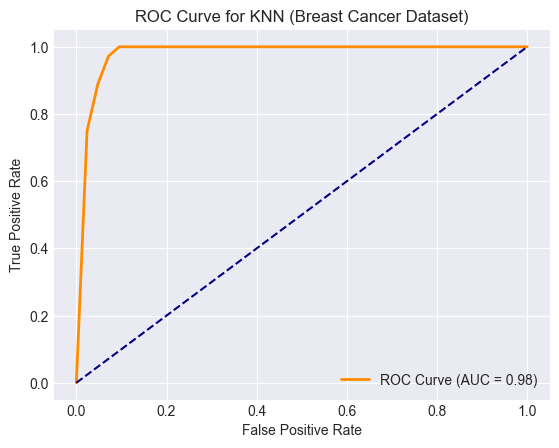

In [30]:
# **Compute and Plot ROC Curve**
y_scores = knn.predict_proba(X_test)[:, 1]  # Get probability estimates for the positive class (Benign)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")  # Random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN (Breast Cancer Dataset)")
plt.legend(loc="lower right")
plt.show()

In [31]:
# classification report
# Generate Classification Report
print("🔹 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=breast_cancer.target_names))



🔹 Classification Report:

              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

